In [45]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from scipy import stats
import statistics as stat

In [46]:
data_c = pd.read_json('/Users/sukhi/Desktop/cmpt353/reddit/bad_comm/controversial_comments.json', lines=True)
data_nc = pd.read_json('/Users/sukhi/Desktop/cmpt353/reddit/good_comm/non_controversial_comments.json', lines=True)

2.4161453002707696e-09 0.5627096808801526
3.9033392301558015e-09 0.5565820757700346


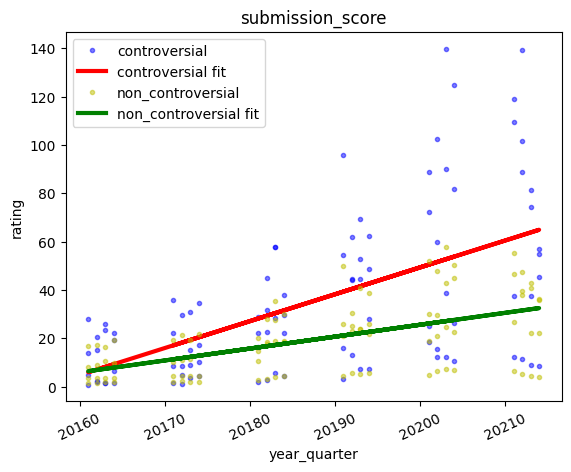

In [47]:
data_cam = data_c
data_ncam = data_nc
##################################################################
data_cam['year_quarter'] = data_cam['year'].astype(str) + data_cam['quarter'].astype(str)
data_ncam['year_quarter'] = data_ncam['year'].astype(str) + data_ncam['quarter'].astype(str)
data_cam = data_cam.drop(['subreddit', 'quarter'], axis=1)
data_ncam = data_ncam.drop(['subreddit', 'quarter'], axis=1)
data_cam['year_quarter'] = data_cam['year_quarter'].astype(int)
data_ncam['year_quarter'] = data_ncam['year_quarter'].astype(int)
data_cam = data_cam[data_cam['avg_submission_score'] < 250]
#data_cam.plot.scatter(x='year_quarter', y='avg_submission_score')
data_ncam = data_ncam[data_ncam['avg_submission_score'] < 250]
x1 = data_cam['year_quarter'].values
y1 = data_cam['avg_submission_score'].values
x2 = data_ncam['year_quarter'].values
y2= data_ncam['avg_submission_score'].values
fit1 = stats.linregress(x1, y1)
fit2 = stats.linregress(x2, y2)
print(fit1.pvalue, fit1.rvalue)
print(fit2.pvalue, fit2.rvalue)
data_cam['predictions'] = data_cam['year_quarter'].values * fit1.slope + fit1.intercept
data_ncam['predictions'] = data_ncam['year_quarter'].values * fit2.slope + fit2.intercept
plt.title('submission_score')
plt.xticks(rotation=25)
plt.xlabel('year_quarter')
plt.ylabel('rating')
plt.plot((data_cam['year_quarter'].values), (data_cam['avg_submission_score'].values), 'b.', alpha = 0.5)
plt.plot((data_cam['year_quarter'].values), (data_cam['predictions'].values), 'r-', linewidth=3)

plt.plot((data_ncam['year_quarter'].values), (data_ncam['avg_submission_score'].values), 'y.', alpha = 0.5)
plt.plot((data_ncam['year_quarter'].values), (data_ncam['predictions'].values), 'g-', linewidth=3)
plt.legend(['controversial', 'controversial fit', 'non_controversial', 'non_controversial fit'])      
plt.show()


(array([ 2.,  1.,  4.,  3., 12., 21., 23., 18.,  7.,  5.]),
 array([-87.1792003 , -72.84618298, -58.51316566, -44.18014834,
        -29.84713103, -15.51411371,  -1.18109639,  13.15192093,
         27.48493825,  41.81795557,  56.15097288]),
 <BarContainer object of 10 artists>)

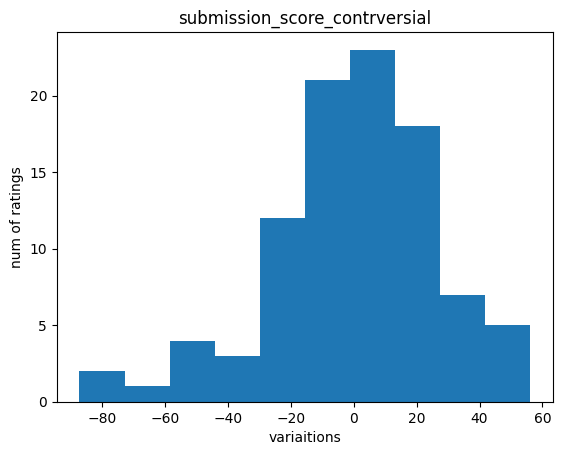

In [48]:
plt.title('submission_score_contrversial')
plt.xlabel('variaitions')
plt.ylabel('num of ratings')
plt.hist(data_cam['predictions'].values-data_cam['avg_submission_score'].values)

(array([ 3.,  3.,  7., 14., 20., 16., 16.,  7.,  6.,  4.]),
 array([-30.73784288, -24.79994995, -18.86205703, -12.92416411,
         -6.98627118,  -1.04837826,   4.88951466,  10.82740759,
         16.76530051,  22.70319343,  28.64108636]),
 <BarContainer object of 10 artists>)

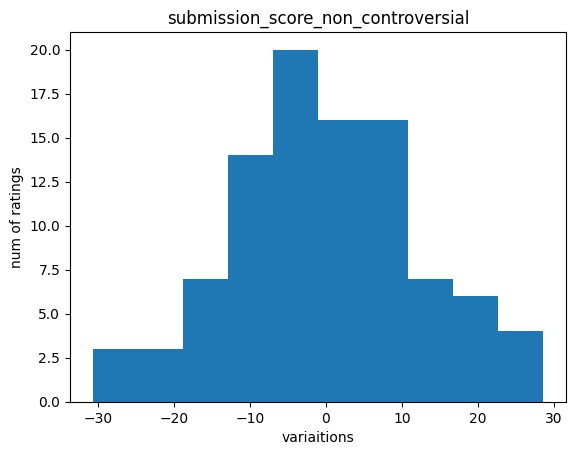

In [49]:
plt.title('submission_score_non_controversial')
plt.xlabel('variaitions')
plt.ylabel('num of ratings')
plt.hist(data_ncam['predictions'].values-data_ncam['avg_submission_score'].values)